In [474]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [475]:
import pandas as pd
data='/home/luis/Desktop/PDG/data/flair_df.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: 'flair_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'flair_df.csv'. Please check the file format.")
    df = None # Assign None to df in case of error

,Unnamed: 0.1,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,...,x.BoundingBox/Mask-original/diagnostics.1,y.BoundingBox/Mask-original/diagnostics.1,z.BoundingBox/Mask-original/diagnostics.1,x.CenterOfMassIndex/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,z.CenterOfMassIndex/Mask-original/diagnostics,x.CenterOfMassIndex/Mask-original/diagnostics.1,y.CenterOfMassIndex/Mask-original/diagnostics.1,z.CenterOfMassIndex/Mask-original/diagnostics.1,highGrade
0,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,...,NaN,NaN,NaN,105.497619,161.988889,124.0,NaN,NaN,NaN,True
1,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,...,NaN,NaN,NaN,174.448790,149.808566,92.0,NaN,NaN,NaN,True
2,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,...,NaN,NaN,NaN,90.755240,152.673859,53.0,NaN,NaN,NaN,True
3,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,...,NaN,NaN,NaN,97.611413,171.559783,45.0,NaN,NaN,NaN,True
4,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,...,NaN,NaN,NaN,127.684988,202.115248,10.0,NaN,NaN,NaN,True


### Basic preprocessing

In [476]:
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
PyRadiomics/Versions/diagnostics
Numpy/Versions/diagnostics
SimpleITK/Versions/diagnostics
PyWavelet/Versions/diagnostics
Python/Versions/diagnostics
Settings/Configuration/diagnostics
EnabledImageTypes/Configuration/diagnostics
Hash/Image-original/diagnostics
Dimensionality/Image-original/diagnostics
Spacing/Image-original/diagnostics
Size/Image-original/diagnostics
Mean/Image-original/diagnostics
Minimum/Image-original/diagnostics
Maximum/Image-original/diagnostics
Hash/Mask-original/diagnostics
Spacing/Mask-original/diagnostics
Size/Mask-original/diagnostics
BoundingBox/Mask-original/diagnostics
VoxelNum/Mask-original/diagnostics
VolumeNum/Mask-original/diagnostics
CenterOfMassIndex/Mask-original/diagnostics
CenterOfMass/Mask-original/diagnostics
10Percentile/firstorder/original
90Percentile/firstorder/original
Energy/firstorder/original
Entropy/firstorder/original
InterquartileRange/firstorder/original
Kurtosis/firstorder/original
Maximum/firstorder/original

In [477]:
df.set_index('Id', inplace=True)
df.shape

(128, 129)

In [478]:
# HIGH and LOW grades balance

print('LOW: ', df[df['highGrade']==False].shape[0]/df.shape[0]) 

print('HIGH: ', df[df['highGrade']==True].shape[0]/df.shape[0]) 

LOW:  0.2265625
HIGH:  0.7734375


In [479]:
# separates object columns containing mainly metadata from 
# the nuemrical columns containing actual radiomic values

df_meta=df.select_dtypes(include=['object'])
df.drop(columns = df_meta.columns, inplace=True)
df.shape    

(128, 118)

In [480]:
df_meta.head()

,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,Dimensionality/Image-original/diagnostics,Hash/Mask-original/diagnostics
Id,,,,,,,,,,,
0.783201,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,3D,731b2f2113593782807db4b12219c2641780e152
0.729412,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,3D,fa7105c5cad49bbeda063571fc091b6740bd8045
0.662097,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,3D,4181a8a9f56aa706f630c2ec846e2b2ef8f29a0a
0.782308,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,3D,1f79e01ce7d0e1d9fba7008e5ecfb3d13ca6f1ad
0.585369,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,3D,5e41117b1288a4f7b6599cccb046a09621df0248


### Statistics

Missing values per column:
 Unnamed: 0.1                                         0
Spacing/Image-original/diagnostics                   0
Size/Image-original/diagnostics                      0
Mean/Image-original/diagnostics                      0
Minimum/Image-original/diagnostics                   0
                                                  ... 
z.CenterOfMassIndex/Mask-original/diagnostics        0
x.CenterOfMassIndex/Mask-original/diagnostics.1    128
y.CenterOfMassIndex/Mask-original/diagnostics.1    128
z.CenterOfMassIndex/Mask-original/diagnostics.1    128
highGrade                                            0
Length: 118, dtype: int64

Number of duplicated rows: 0

Summary Statistics:
        Unnamed: 0.1  Spacing/Image-original/diagnostics  \
count         128.0                          128.000000   
mean            0.0                            2.246744   
std             0.0                            1.699386   
min             0.0                            0.1816

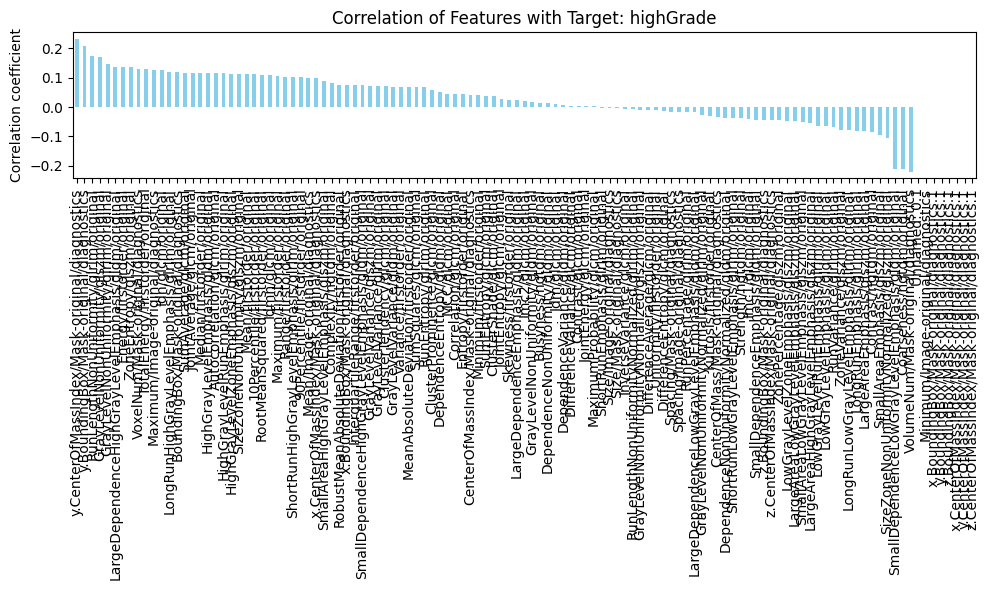

'\n# Histograms of numerical features\ndf.hist(figsize=(20, 20), bins=50)\nplt.suptitle("Histograms of Numerical Features")\nplt.show()\n\n# Pairplot for a subset of features\nsns.pairplot(df[[\'Strength\', \'Size.a\', \'Size.b\', \'Size.c\']], diag_kind="kde")\nplt.suptitle("Pairplot of Selected Features")\nplt.show()'

In [481]:
### Numerical Statistiques

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicated rows
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

# Summary statistics
print("\nSummary Statistics:\n", df.describe())


correlation_with_target = df.corr()['highGrade'].drop('highGrade').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target: highGrade')
plt.ylabel('Correlation coefficient')
plt.tight_layout()
plt.show()


'''
# Histograms of numerical features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Strength', 'Size.a', 'Size.b', 'Size.c']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()'''

y.CenterOfMassIndex/Mask-original/diagnostics         0.232201
VolumeNum/Mask-original/diagnostics                   0.220661
Coarseness/ngtdm/original                             0.211553
SmallDependenceLowGrayLevelEmphasis/gldm/original     0.211097
y.BoundingBox/Mask-original/diagnostics               0.207610
RunLengthNonUniformity/glrlm/original                 0.172801
GrayLevelNonUniformity/glszm/original                 0.169387
GrayLevelNonUniformity/glrlm/original                 0.146192
LargeDependenceHighGrayLevelEmphasis/gldm/original    0.138135
Energy/firstorder/original                            0.137992
ZoneEntropy/glszm/original                            0.135012
VoxelNum/Mask-original/diagnostics                    0.129865
TotalEnergy/firstorder/original                       0.129061
Maximum/Image-original/diagnostics                    0.127572
Idn/glcm/original                                     0.127063
Name: highGrade, dtype: float64


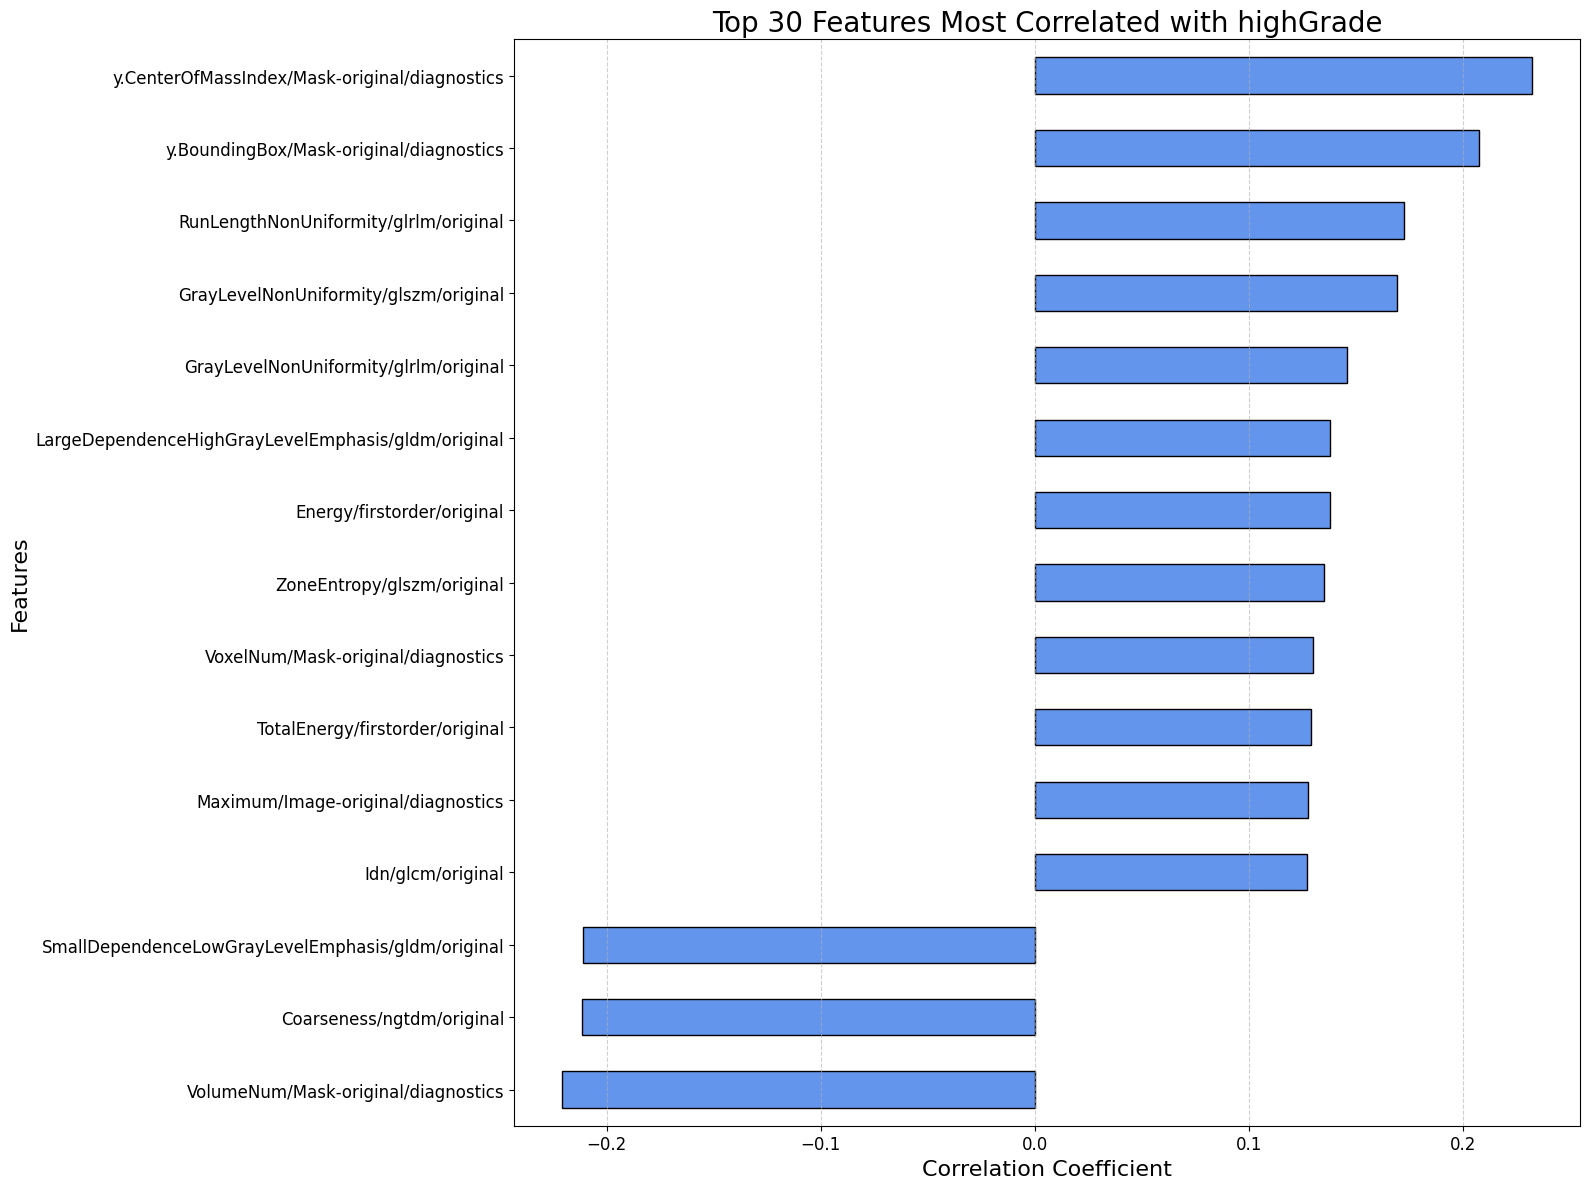

In [ ]:

# Get top 30 features by absolute correlation
top = correlation_with_target.abs().sort_values(ascending=False).head(15)

print(top)

# Retrieve original signed correlations for those top 30 features
top_signed = correlation_with_target[top.index]


# Plot
plt.figure(figsize=(16, 12))  # Bigger figure size
top_signed.sort_values().plot(
    kind='barh',
    color='cornflowerblue',
    edgecolor='black'
)

plt.title('Most Correlated Features with highGrade', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [483]:
df_cp=df.copy()

cols_to_drop=[col for col in df.columns if col not in top.index]
cols_to_drop
df.drop(columns=cols_to_drop, inplace=True)
df['highGrade']=df_cp['highGrade']
df

,Maximum/Image-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,Energy/firstorder/original,TotalEnergy/firstorder/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,GrayLevelNonUniformity/glrlm/original,RunLengthNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,ZoneEntropy/glszm/original,Coarseness/ngtdm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
Id,,,,,,,,,,,,,,,,
0.783201,237.0,1260,1,1.115748e+07,1.115748e+07,0.935386,652.826984,0.006669,158.590584,175.099687,17.388889,4.696937,0.007719,138.0,161.988889,True
0.729412,253.0,2685,1,3.206621e+07,3.206621e+07,0.934436,611.548231,0.009179,293.777441,546.590764,50.100719,5.422075,0.004074,112.0,149.808566,True
0.662097,270.0,3244,1,5.772904e+07,5.505470e+07,0.934934,660.159679,0.008074,435.126064,961.241702,85.296015,5.453404,0.002515,104.0,152.673859,True
0.782308,314.0,1840,1,5.558937e+07,4.038406e+07,0.951514,1143.141304,0.006239,158.487887,273.906764,27.150943,5.047446,0.006769,150.0,171.559783,True
0.585369,981.0,1692,1,5.079416e+08,1.705622e+09,0.949190,3356.104019,0.001814,149.244465,696.367524,44.787419,5.763565,0.006528,181.0,202.115248,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,277.0,1889,1,2.601654e+07,2.481130e+07,0.946634,914.722605,0.005010,218.499407,273.046673,26.022901,5.046687,0.005374,108.0,132.161461,False
0.720461,325.0,3652,1,7.703724e+07,7.946346e+07,0.942016,1141.659639,0.009901,336.608660,778.238077,65.146868,5.347434,0.003218,61.0,101.386911,False
0.601364,1411.0,6199,1,3.315145e+09,1.113196e+10,0.967871,9096.525085,0.000652,434.953676,2394.525537,126.697412,6.406543,0.002340,137.0,188.893209,True


## Outliers

In [484]:
#getting targets
targets=df[['highGrade']]

df.drop(columns=['highGrade'], inplace=True)

In [485]:
df_cp=df.copy()

### General Outliers

total outlier columns:  11
15


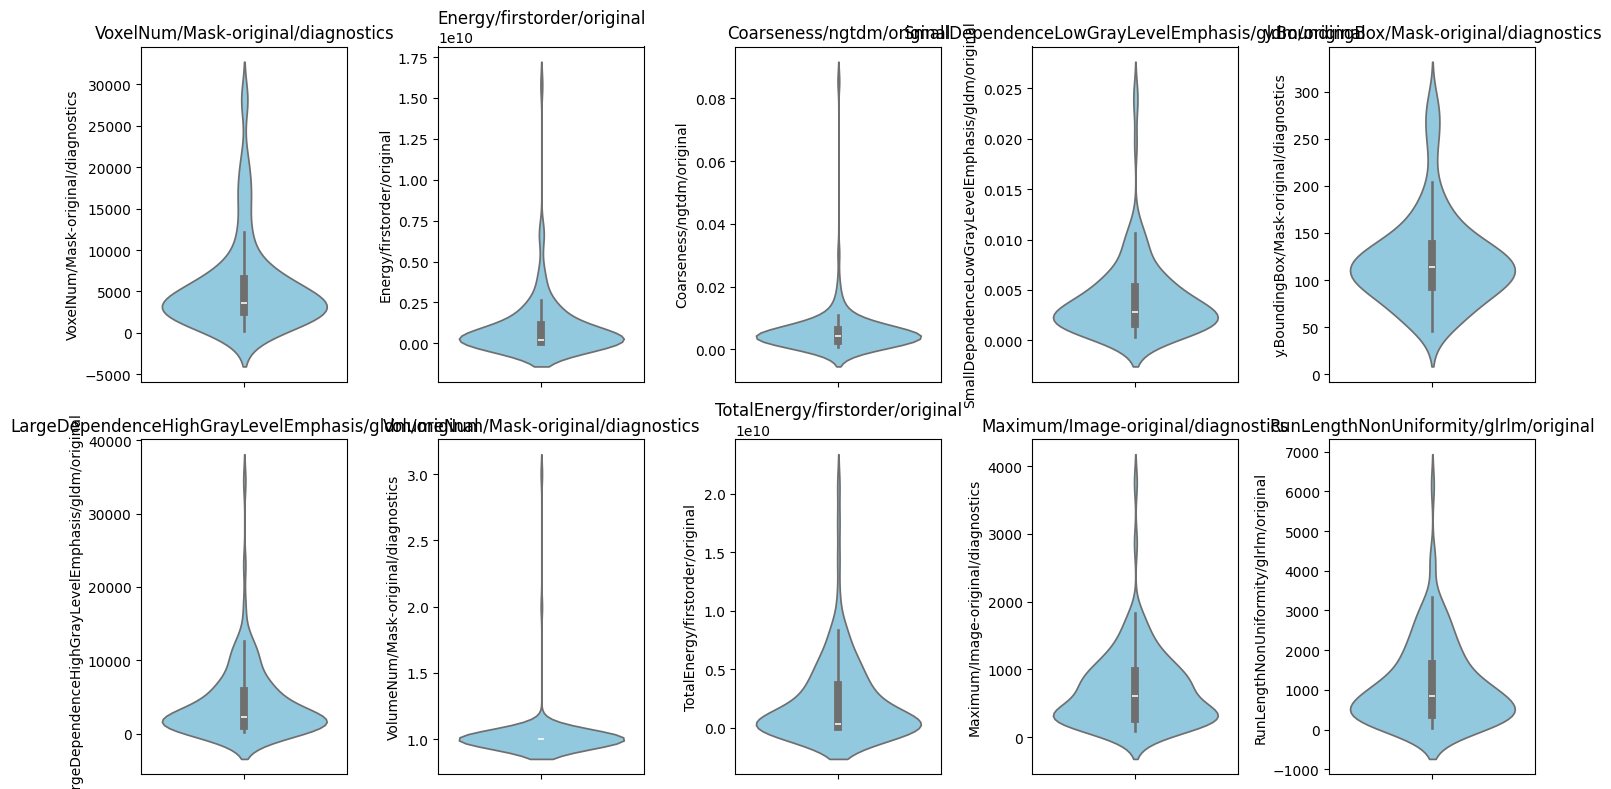

In [486]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=3
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total outlier columns: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### Low Grade Outliers

/tmp/ipykernel_17295/3208747073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['highGrade'], inplace=True)


total out:  2
15


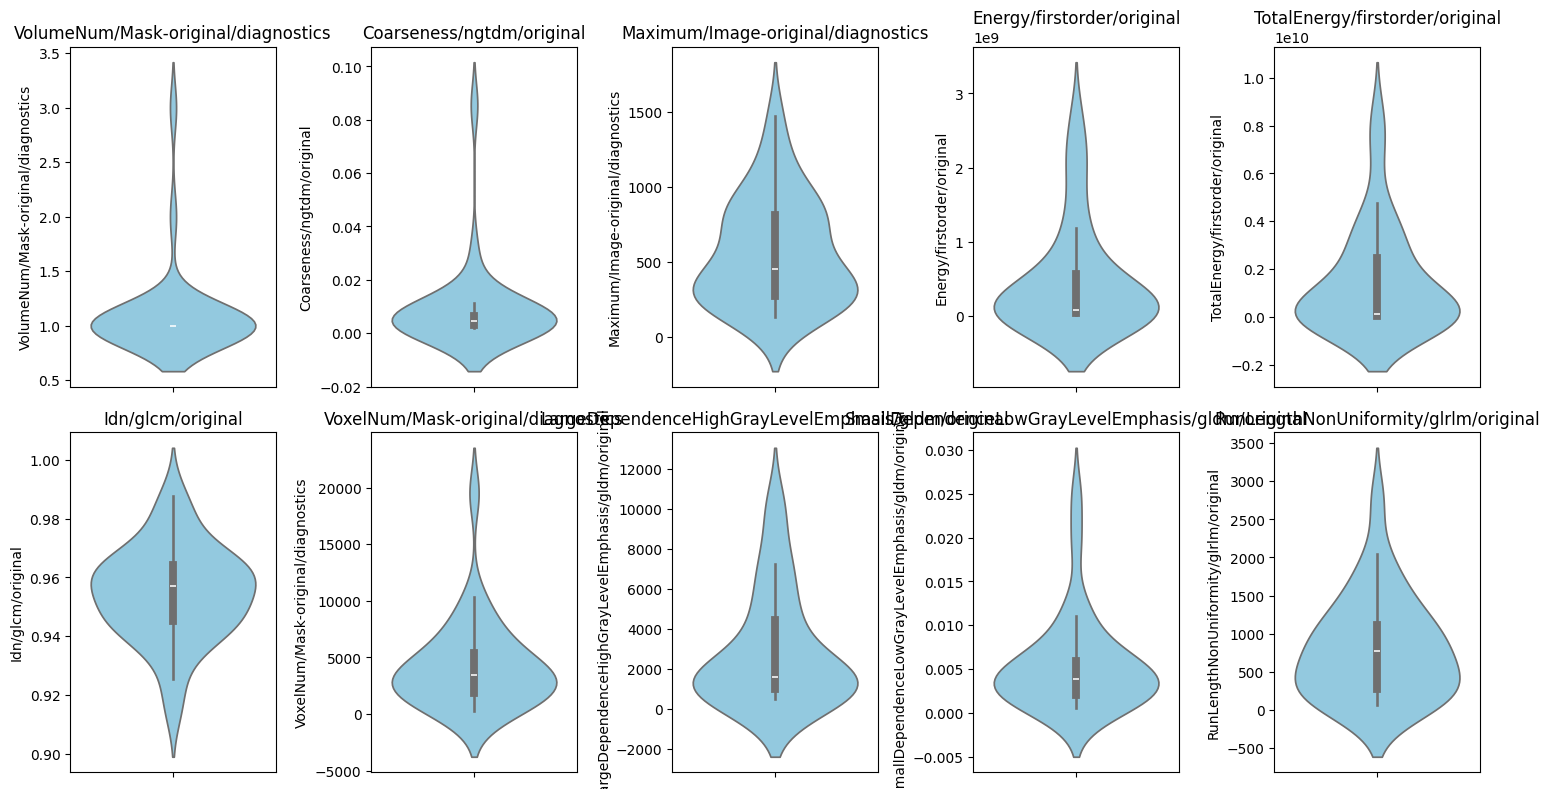

In [487]:

df['highGrade']=targets['highGrade']
df=df[df['highGrade']==False]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### High Grade Outliers

total out:  1
15


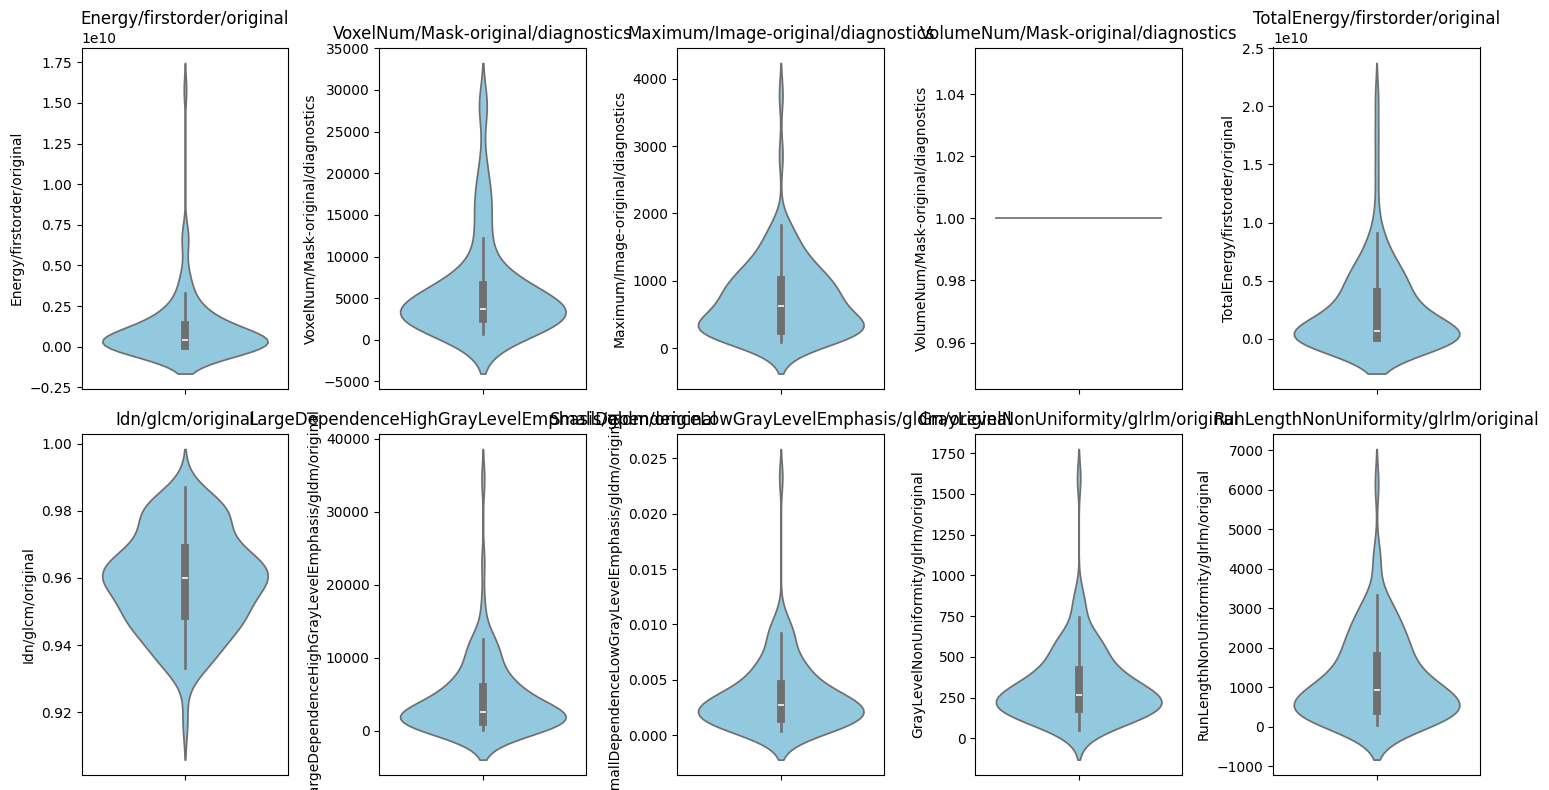

In [488]:

df=df_cp.copy()
df['highGrade']=targets['highGrade']
df=df[df['highGrade']==True]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [489]:
df=df_cp.copy()
df['highGrade']=targets['highGrade']

In [490]:

df = df.loc[:, df.nunique() > 1]
df

,Maximum/Image-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,Energy/firstorder/original,TotalEnergy/firstorder/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,GrayLevelNonUniformity/glrlm/original,RunLengthNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,ZoneEntropy/glszm/original,Coarseness/ngtdm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
Id,,,,,,,,,,,,,,,,
0.783201,237.0,1260,1,1.115748e+07,1.115748e+07,0.935386,652.826984,0.006669,158.590584,175.099687,17.388889,4.696937,0.007719,138.0,161.988889,True
0.729412,253.0,2685,1,3.206621e+07,3.206621e+07,0.934436,611.548231,0.009179,293.777441,546.590764,50.100719,5.422075,0.004074,112.0,149.808566,True
0.662097,270.0,3244,1,5.772904e+07,5.505470e+07,0.934934,660.159679,0.008074,435.126064,961.241702,85.296015,5.453404,0.002515,104.0,152.673859,True
0.782308,314.0,1840,1,5.558937e+07,4.038406e+07,0.951514,1143.141304,0.006239,158.487887,273.906764,27.150943,5.047446,0.006769,150.0,171.559783,True
0.585369,981.0,1692,1,5.079416e+08,1.705622e+09,0.949190,3356.104019,0.001814,149.244465,696.367524,44.787419,5.763565,0.006528,181.0,202.115248,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,277.0,1889,1,2.601654e+07,2.481130e+07,0.946634,914.722605,0.005010,218.499407,273.046673,26.022901,5.046687,0.005374,108.0,132.161461,False
0.720461,325.0,3652,1,7.703724e+07,7.946346e+07,0.942016,1141.659639,0.009901,336.608660,778.238077,65.146868,5.347434,0.003218,61.0,101.386911,False
0.601364,1411.0,6199,1,3.315145e+09,1.113196e+10,0.967871,9096.525085,0.000652,434.953676,2394.525537,126.697412,6.406543,0.002340,137.0,188.893209,True


In [491]:
import pandas as pd
# Función para detectar y tratar outliers utilizando el IQR
def tratar_outliers_iqr(df, multiplier=8):
    # Selecciona solo las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites inferior y superior para los outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier* IQR

        # Imprimir los límites de cada columna
        #print(f"{col}: Limite inferior={lower_bound}, Limite superior={upper_bound}")

        # Reemplazar los valores por los límites (capping)
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Aplicar la función para tratar los outliers en el DataFrame
df = tratar_outliers_iqr(df)


In [492]:
df.to_csv('processedFlair.csv', index=True)

In [493]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Function to calculate Cohen's d for numerical columns
def cohens_d(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt(((group1.shape[0]-1)*(group1.std()**2) + (group1.shape[0]-1)*(group2.std()**2)) / (group1.shape[0]+group2.shape[0]-2))
    return np.abs(mean_diff / pooled_std)


high_graders = df[df['highGrade'] == True]
low_graders = df[df['highGrade'] == False]

differences = []


for column in df.columns:
    if column == 'highGrade':
        continue

    # Calculate Cohen's d for numerical columns
    d = cohens_d(high_graders[column], low_graders[column])
    differences.append((column, d, 'numerical'))


# Convert to DataFrame and sort by difference score
diff_df = pd.DataFrame(differences, columns=['Column', 'Difference', 'Type'])
top_10 = diff_df.sort_values(by='Difference', ascending=False).head(30)

# Print results
print("Top 10 columns with largest differences between highGraders and lowGraders:")
print(top_10[['Column', 'Difference', 'Type']])

Top 10 columns with largest differences between highGraders and lowGraders:
                                               Column  Difference       Type
14      y.CenterOfMassIndex/Mask-original/diagnostics    0.465312  numerical
13            y.BoundingBox/Mask-original/diagnostics    0.414888  numerical
9               RunLengthNonUniformity/glrlm/original    0.374059  numerical
7   SmallDependenceLowGrayLevelEmphasis/gldm/original    0.350334  numerical
10              GrayLevelNonUniformity/glszm/original    0.342483  numerical
3                          Energy/firstorder/original    0.340941  numerical
12                          Coarseness/ngtdm/original    0.312073  numerical
8               GrayLevelNonUniformity/glrlm/original    0.311097  numerical
6   LargeDependenceHighGrayLevelEmphasis/gldm/orig...    0.302397  numerical
4                     TotalEnergy/firstorder/original    0.278149  numerical
1                  VoxelNum/Mask-original/diagnostics    0.275115  numerical


/tmp/ipykernel_17295/2759210152.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(mean_diff / pooled_std)
